In [1]:
from langchain_community.document_loaders import PyPDFLoader
from langchain_core.documents import Document
import unidecode
from langchain_openai import ChatOpenAI
from langchain_anthropic import ChatAnthropic
from langchain_core.messages import HumanMessage, SystemMessage
from langchain_community.callbacks.manager import get_openai_callback
from pydantic import BaseModel, Field
import os
import re
from glob import glob
import logging
import json
import os
import shutil
import asyncio

import dotenv
dotenv.load_dotenv()

True

In [8]:
def save_docs_to_jsonl(array:list[Document], file_path:str)->None:
    with open(file_path, 'w') as jsonl_file:
        for doc in array:
            jsonl_file.write(doc.model_dump_json() + '\n')

def load_docs_from_jsonl(file_path: str)->list[Document]:
    array = []
    with open(file_path, 'r') as jsonl_file:
        for line in jsonl_file:
            data = json.loads(line)
            obj = Document(**data)
            array.append(obj)
    return array


In [58]:
paths = glob("/Users/personal/projects/chitrapurgpt/documents/*.pdf")

articles = []
for path in paths:
    articles.extend(extract_articles(path))

save_docs_to_jsonl(articles,'knowledge_base.jsonl')


INFO: HTTP Request: POST https://api.anthropic.com/v1/messages "HTTP/1.1 200 OK"


Prompt Tokens: 21150
Completion Tokens: 1868
Total Tokens: 23018
Prompt Cost: $0.063450
Completion Cost: $0.028020
Total Cost: $0.091470
extracted 12 articles


INFO: HTTP Request: POST https://api.anthropic.com/v1/messages "HTTP/1.1 200 OK"


Prompt Tokens: 22754
Completion Tokens: 1915
Total Tokens: 24669
Prompt Cost: $0.068262
Completion Cost: $0.028725
Total Cost: $0.096987
extracted 12 articles


INFO: HTTP Request: POST https://api.anthropic.com/v1/messages "HTTP/1.1 200 OK"


Prompt Tokens: 18992
Completion Tokens: 1468
Total Tokens: 20460
Prompt Cost: $0.056976
Completion Cost: $0.022020
Total Cost: $0.078996
extracted 9 articles


In [4]:
# save_docs_to_jsonl(articles,'knowledge_base.jsonl')

articles=load_docs_from_jsonl('knowledge_base.jsonl')
print(len(articles))


33


In [44]:
# rename 2022- present


paths = glob("documents/*.pdf")

async def extract_date_from_filename(filename:str)->str:
    llm = ChatOpenAI(model="gpt-4o", temperature=0, max_tokens=100)
    prompt = f"""
Extract the date in Month, Year format. for example:
May, 2019
April, 1955
December January, 2023

respond only with your answer and nothing else.
Here is the filename:
{filename}
"""
    response = await llm.ainvoke(prompt)
    month, year = response.content.split(",")
    month = month.strip()
    year = year.strip()
    return month, year



async def process_paths():
    tasks = []
    for path in paths:
        task = asyncio.create_task(extract_date_from_filename(path))
        tasks.append((path, task))
    
    dates = []
    for path, task in tasks:
        date = await task
        dates.append((path, date))
        print(path, date)
    return dates

results = await process_paths()

def construct_new_path(path:str, date:str)->str:
    month, year = date
    path = f"documents_renamed/Sunbeam-{year}-{month}.pdf"
    return path

path_pairs = [(path,construct_new_path(path, date)) for path, date in results]


for path, new_path in path_pairs:
    shutil.copy(path, new_path)


documents/129_SunbeamSeptember2023Issue.pdf ('September', '2023')
documents/133_SunbeamJanuary2024Issue.pdf ('January', '2024')
documents/124_SunbeamMarch2023Issue.pdf ('March', '2023')
documents/143_SunbeamOctober2024Issue.pdf ('October', '2024')
documents/128_SunbeamAugust2023Issue.pdf ('August', '2023')
documents/132_SunbeamDecember2023Issue.pdf ('December', '2023')
documents/119_SunbeamOctober2022Issue.pdf ('October', '2022')
documents/140_SunbeamAugust2024Issue.pdf ('August', '2024')
documents/125_SunbeamApril2023Issue.pdf ('April', '2023')
documents/111_SunbeamFebruary2022Issue.pdf ('February', '2022')
documents/110_SunbeamJanuary2022Issue.pdf ('January', '2022')
documents/113_SunbeamApril2022Issue.pdf ('April', '2022')
documents/141_SunbeamSeptember2024Issue.pdf ('September', '2024')
documents/121_SunbeamDecember2022Issue11.pdf ('December', '2022')
documents/123_SunbeamFebruary2023Issue1.pdf ('February', '2023')
documents/116_SunbeamJuly2022Issue.pdf ('July', '2022')
documents/1

In [45]:
# rename 1954-1978

from datetime import datetime
paths = glob("documents_1954_to_1978/*.pdf")

def create_new_filename(filename:str)->str:
    magazine, year, month = filename.split("/")[-1].split(".")[0].split(" ")

    #convert number month to text month
    month = datetime.strptime(month, "%m").strftime("%B")
    return f"documents_renamed/Sunbeam-{year}-{month}.pdf"

path_pairs = [(path,create_new_filename(path)) for path in paths]

for path, new_path in path_pairs:
    shutil.copy(path, new_path)




In [3]:
# rename 1991-1999

from datetime import datetime
paths = glob("documents_1991_to_1999/*.pdf")

def create_new_filename(filename:str)->str:
    magazine, year, month = filename.split("/")[-1].split(".")[0].split(" ")

    #convert number month to text month
    month = datetime.strptime(month, "%m").strftime("%B")
    return f"documents_renamed/Sunbeam-{year}-{month}.pdf"

path_pairs = [(path,create_new_filename(path)) for path in paths]

for path, new_path in path_pairs:
    shutil.copy(path, new_path)




In [2]:
# rename 2000-2021

from datetime import datetime
paths = glob("documents/documents_2000_to_2021/*.pdf")

def create_new_filename(filename:str)->str:
    magazine, year, month = filename.split("/")[-1].split(".")[0].split(" ")

    #convert number month to text month
    month = datetime.strptime(month, "%m").strftime("%B")
    return f"documents/documents_renamed/Sunbeam-{year}-{month}.pdf"

path_pairs = [(path,create_new_filename(path)) for path in paths]

for path, new_path in path_pairs:
    shutil.copy(path, new_path)




In [53]:
# llm = ChatAnthropic(model="claude-3-opus-20240229", temperature=0, max_tokens=8000)
from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(model="gemini-1.5-pro", temperature=0)

/opt/anaconda3/envs/chitrapurgpt/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
llm = ChatAnthropic(model="claude-3-5-sonnet-latest", temperature=0, max_tokens=8000)

In [5]:
llm.invoke("Hello, world!")

AIMessage(content='Hi! Nice to meet you. How can I help you today?', additional_kwargs={}, response_metadata={'id': 'msg_0168H1CmPHkhgAFHXX3Gu6Sk', 'model': 'claude-3-5-sonnet-20241022', 'stop_reason': 'end_turn', 'stop_sequence': None, 'usage': {'cache_creation_input_tokens': 0, 'cache_read_input_tokens': 0, 'input_tokens': 11, 'output_tokens': 17}}, id='run-f7a14e5b-4e42-40a8-a56c-db372fb93835-0', usage_metadata={'input_tokens': 11, 'output_tokens': 17, 'total_tokens': 28, 'input_token_details': {'cache_read': 0, 'cache_creation': 0}})

In [7]:

from retrievers import load_vector_store

In [8]:
db = load_vector_store()


2025-03-01 16:10:01 - Anonymized telemetry enabled. See                     https://docs.trychroma.com/telemetry for more information.


/opt/anaconda3/envs/chitrapurgpt/lib/python3.12/site-packages/pinecone/data/index.py:1: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [4]:
import getpass
import os
import time

from pinecone import Pinecone, ServerlessSpec


index_name = "chitrapur-gpt"  # change if desired

def create_or_fetch_pinecone_index(index_name:str):
    pc = Pinecone()
    existing_indexes = [index_info["name"] for index_info in pc.list_indexes()]
    if index_name not in existing_indexes:
        pc.create_index(
            name=index_name,
            dimension=3072,
            metric="cosine",
            spec=ServerlessSpec(cloud="aws", region="us-east-1"),
        )
        while not pc.describe_index(index_name).status["ready"]:
            time.sleep(1)

    return pc.Index(index_name)

In [ ]:
from langchain_pinecone import PineconeVectorStore

vector_store = PineconeVectorStore(index=create_or_fetch_pinecone_index("chitrapur-gpt"), embedding=embeddings)

In [8]:
from retrievers import *
import json

In [3]:
articles = load_docs_from_jsonl('knowledge_base.jsonl')
metas = [doc.metadata for doc in articles]

In [10]:
#convert metas to json strings
max([len(json.dumps(clean_metadata(meta))) for meta in metas])

514

In [ ]:
articles = load_docs_from_jsonl('knowledge_base.jsonl')
batch_size = 200
for i in range(0, len(articles), batch_size):
    batch = articles[i:i+batch_size]
    add_to_vector_store(batch)
    

In [11]:
vector_db = load_vector_store()

2025-03-01 18:49:25 - Discovering subpackages in _NamespacePath(['/opt/anaconda3/envs/chitrapurgpt/lib/python3.12/site-packages/pinecone_plugins'])
2025-03-01 18:49:25 - Looking for plugins in pinecone_plugins.inference
2025-03-01 18:49:25 - Installing plugin inference into Pinecone
2025-03-01 18:49:26 - Discovering subpackages in _NamespacePath(['/opt/anaconda3/envs/chitrapurgpt/lib/python3.12/site-packages/pinecone_plugins'])
2025-03-01 18:49:26 - Looking for plugins in pinecone_plugins.inference


In [23]:
from pinecone import Pinecone
pc = Pinecone()
index = pc.Index("chitrapur-gpt")



2025-03-01 23:49:02 - Discovering subpackages in _NamespacePath(['/opt/anaconda3/envs/chitrapurgpt/lib/python3.12/site-packages/pinecone_plugins'])
2025-03-01 23:49:02 - Looking for plugins in pinecone_plugins.inference
2025-03-01 23:49:02 - Installing plugin inference into Pinecone
2025-03-01 23:49:02 - Discovering subpackages in _NamespacePath(['/opt/anaconda3/envs/chitrapurgpt/lib/python3.12/site-packages/pinecone_plugins'])
2025-03-01 23:49:02 - Looking for plugins in pinecone_plugins.inference


In [24]:
for i in index.list():
    print(i)

['Sunbeam-1954-January.txt-Cover Page', 'Sunbeam-1954-January.txt-Nectar from the Gitas', 'Sunbeam-1954-July.txt-Lakshmana', 'Sunbeam-1956-April.txt-Arjuna', 'Sunbeam-1956-April.txt-At the Meetings of the Mathadhipaties', 'Sunbeam-1956-April.txt-Blessings by His Holiness to the Mahasabha', 'Sunbeam-1956-April.txt-Cover Page', 'Sunbeam-1956-April.txt-Crossing Beyond the Qualities', 'Sunbeam-1956-April.txt-List of Festivals', 'Sunbeam-1956-April.txt-Math News and Notes', 'Sunbeam-1956-April.txt-Paths to Realisation', "Sunbeam-1956-April.txt-Proceedings of the Vaidiks' Conference", 'Sunbeam-1956-April.txt-Saint Appayya of Bhatkal', 'Sunbeam-1956-April.txt-Sitting in Silence', 'Sunbeam-1956-April.txt-The Best Form of Worship', 'Sunbeam-1956-April.txt-The Legislative Sphere', 'Sunbeam-1956-April.txt-Things Difficult and Rare', 'Sunbeam-1956-October.txt-Cover Page', 'Sunbeam-1956-October.txt-Ekalavya', 'Sunbeam-1956-October.txt-Index, 1954-56', 'Sunbeam-1956-October.txt-Math News and Notes',

In [20]:
ids = [i for i in index.list()]

In [25]:
from tqdm import trange

In [26]:
articles = load_docs_from_jsonl('knowledge_base.jsonl')
batch_size = 100
for i in trange(0, len(articles), batch_size):
    batch = articles[i:i+batch_size]
    add_to_vector_store(batch)

  0%|          | 0/29 [00:00<?, ?it/s]

2025-03-01 23:51:21 - Discovering subpackages in _NamespacePath(['/opt/anaconda3/envs/chitrapurgpt/lib/python3.12/site-packages/pinecone_plugins'])
2025-03-01 23:51:21 - Looking for plugins in pinecone_plugins.inference
2025-03-01 23:51:21 - Installing plugin inference into Pinecone
2025-03-01 23:51:22 - Discovering subpackages in _NamespacePath(['/opt/anaconda3/envs/chitrapurgpt/lib/python3.12/site-packages/pinecone_plugins'])
2025-03-01 23:51:22 - Looking for plugins in pinecone_plugins.inference
2025-03-01 23:51:26 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


  3%|▎         | 1/29 [00:11<05:09, 11.05s/it]

2025-03-01 23:51:32 - Discovering subpackages in _NamespacePath(['/opt/anaconda3/envs/chitrapurgpt/lib/python3.12/site-packages/pinecone_plugins'])
2025-03-01 23:51:32 - Looking for plugins in pinecone_plugins.inference
2025-03-01 23:51:32 - Installing plugin inference into Pinecone
2025-03-01 23:51:33 - Discovering subpackages in _NamespacePath(['/opt/anaconda3/envs/chitrapurgpt/lib/python3.12/site-packages/pinecone_plugins'])
2025-03-01 23:51:33 - Looking for plugins in pinecone_plugins.inference
2025-03-01 23:51:36 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


  7%|▋         | 2/29 [00:21<04:50, 10.77s/it]

2025-03-01 23:51:43 - Discovering subpackages in _NamespacePath(['/opt/anaconda3/envs/chitrapurgpt/lib/python3.12/site-packages/pinecone_plugins'])
2025-03-01 23:51:43 - Looking for plugins in pinecone_plugins.inference
2025-03-01 23:51:43 - Installing plugin inference into Pinecone
2025-03-01 23:51:44 - Discovering subpackages in _NamespacePath(['/opt/anaconda3/envs/chitrapurgpt/lib/python3.12/site-packages/pinecone_plugins'])
2025-03-01 23:51:44 - Looking for plugins in pinecone_plugins.inference
2025-03-01 23:51:48 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


 10%|█         | 3/29 [00:33<04:47, 11.06s/it]

2025-03-01 23:51:54 - Discovering subpackages in _NamespacePath(['/opt/anaconda3/envs/chitrapurgpt/lib/python3.12/site-packages/pinecone_plugins'])
2025-03-01 23:51:54 - Looking for plugins in pinecone_plugins.inference
2025-03-01 23:51:54 - Installing plugin inference into Pinecone
2025-03-01 23:51:55 - Discovering subpackages in _NamespacePath(['/opt/anaconda3/envs/chitrapurgpt/lib/python3.12/site-packages/pinecone_plugins'])
2025-03-01 23:51:55 - Looking for plugins in pinecone_plugins.inference
2025-03-01 23:51:58 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


 14%|█▍        | 4/29 [00:43<04:27, 10.69s/it]

2025-03-01 23:52:04 - Discovering subpackages in _NamespacePath(['/opt/anaconda3/envs/chitrapurgpt/lib/python3.12/site-packages/pinecone_plugins'])
2025-03-01 23:52:04 - Looking for plugins in pinecone_plugins.inference
2025-03-01 23:52:04 - Installing plugin inference into Pinecone
2025-03-01 23:52:05 - Discovering subpackages in _NamespacePath(['/opt/anaconda3/envs/chitrapurgpt/lib/python3.12/site-packages/pinecone_plugins'])
2025-03-01 23:52:05 - Looking for plugins in pinecone_plugins.inference
2025-03-01 23:52:08 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


 17%|█▋        | 5/29 [00:53<04:10, 10.45s/it]

2025-03-01 23:52:14 - Discovering subpackages in _NamespacePath(['/opt/anaconda3/envs/chitrapurgpt/lib/python3.12/site-packages/pinecone_plugins'])
2025-03-01 23:52:14 - Looking for plugins in pinecone_plugins.inference
2025-03-01 23:52:14 - Installing plugin inference into Pinecone
2025-03-01 23:52:15 - Discovering subpackages in _NamespacePath(['/opt/anaconda3/envs/chitrapurgpt/lib/python3.12/site-packages/pinecone_plugins'])
2025-03-01 23:52:15 - Looking for plugins in pinecone_plugins.inference
2025-03-01 23:52:19 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


 21%|██        | 6/29 [01:03<04:00, 10.45s/it]

2025-03-01 23:52:25 - Discovering subpackages in _NamespacePath(['/opt/anaconda3/envs/chitrapurgpt/lib/python3.12/site-packages/pinecone_plugins'])
2025-03-01 23:52:25 - Looking for plugins in pinecone_plugins.inference
2025-03-01 23:52:25 - Installing plugin inference into Pinecone
2025-03-01 23:52:26 - Discovering subpackages in _NamespacePath(['/opt/anaconda3/envs/chitrapurgpt/lib/python3.12/site-packages/pinecone_plugins'])
2025-03-01 23:52:26 - Looking for plugins in pinecone_plugins.inference
2025-03-01 23:52:30 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


 24%|██▍       | 7/29 [01:15<03:57, 10.79s/it]

2025-03-01 23:52:36 - Discovering subpackages in _NamespacePath(['/opt/anaconda3/envs/chitrapurgpt/lib/python3.12/site-packages/pinecone_plugins'])
2025-03-01 23:52:36 - Looking for plugins in pinecone_plugins.inference
2025-03-01 23:52:36 - Installing plugin inference into Pinecone
2025-03-01 23:52:37 - Discovering subpackages in _NamespacePath(['/opt/anaconda3/envs/chitrapurgpt/lib/python3.12/site-packages/pinecone_plugins'])
2025-03-01 23:52:37 - Looking for plugins in pinecone_plugins.inference
2025-03-01 23:52:42 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


 24%|██▍       | 7/29 [01:29<04:41, 12.79s/it]

API call failed after 3 attempts: (400)
Reason: Bad Request
HTTP response headers: HTTPHeaderDict({'Date': 'Sat, 01 Mar 2025 18:22:51 GMT', 'Content-Type': 'application/json', 'Content-Length': '116', 'Connection': 'keep-alive', 'x-pinecone-request-latency-ms': '93', 'x-pinecone-request-id': '451187949751311754', 'x-envoy-upstream-service-time': '5', 'server': 'envoy'})
HTTP response body: {"code":3,"message":"Metadata size is 140231 bytes, which exceeds the limit of 40960 bytes per vector","details":[]}



PineconeApiException: (400)
Reason: Bad Request
HTTP response headers: HTTPHeaderDict({'Date': 'Sat, 01 Mar 2025 18:22:51 GMT', 'Content-Type': 'application/json', 'Content-Length': '116', 'Connection': 'keep-alive', 'x-pinecone-request-latency-ms': '93', 'x-pinecone-request-id': '451187949751311754', 'x-envoy-upstream-service-time': '5', 'server': 'envoy'})
HTTP response body: {"code":3,"message":"Metadata size is 140231 bytes, which exceeds the limit of 40960 bytes per vector","details":[]}


In [36]:
batch = articles[705:706]
add_to_vector_store(batch)

2025-03-01 23:56:41 - Discovering subpackages in _NamespacePath(['/opt/anaconda3/envs/chitrapurgpt/lib/python3.12/site-packages/pinecone_plugins'])
2025-03-01 23:56:41 - Looking for plugins in pinecone_plugins.inference
2025-03-01 23:56:41 - Installing plugin inference into Pinecone
2025-03-01 23:56:43 - Discovering subpackages in _NamespacePath(['/opt/anaconda3/envs/chitrapurgpt/lib/python3.12/site-packages/pinecone_plugins'])
2025-03-01 23:56:43 - Looking for plugins in pinecone_plugins.inference
2025-03-01 23:56:45 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
API call failed after 3 attempts: (400)
Reason: Bad Request
HTTP response headers: HTTPHeaderDict({'Date': 'Sat, 01 Mar 2025 18:26:52 GMT', 'Content-Type': 'application/json', 'Content-Length': '116', 'Connection': 'keep-alive', 'x-pinecone-request-latency-ms': '11', 'x-pinecone-request-id': '781435437945730000', 'x-envoy-upstream-service-time': '1', 'server': 'envoy'})
HTTP response body: {"code"

PineconeApiException: (400)
Reason: Bad Request
HTTP response headers: HTTPHeaderDict({'Date': 'Sat, 01 Mar 2025 18:26:52 GMT', 'Content-Type': 'application/json', 'Content-Length': '116', 'Connection': 'keep-alive', 'x-pinecone-request-latency-ms': '11', 'x-pinecone-request-id': '781435437945730000', 'x-envoy-upstream-service-time': '1', 'server': 'envoy'})
HTTP response body: {"code":3,"message":"Metadata size is 140231 bytes, which exceeds the limit of 40960 bytes per vector","details":[]}


In [43]:
pprint(clean_metadata(articles[705].metadata))

{'author': 'A. S. PADUKONE',
 'end_line': 2227,
 'end_page': 34,
 'published_date': '01-01-1954',
 'source': 'Sunbeam-1954-January.txt',
 'start_line': 220,
 'start_page': 6,
 'summary': 'Detailed financial report of the Shri Chitrapur Math including '
            'accounts, collections, and administrative matters for the year '
            '1952-53.',
 'title': 'Standing Committee Circular'}


In [44]:
pprint(clean_metadata(articles[705].metadata))

{'author': 'A. S. PADUKONE',
 'end_line': 2227,
 'end_page': 34,
 'published_date': '01-01-1954',
 'source': 'Sunbeam-1954-January.txt',
 'start_line': 220,
 'start_page': 6,
 'summary': 'Detailed financial report of the Shri Chitrapur Math including '
            'accounts, collections, and administrative matters for the year '
            '1952-53.',
 'title': 'Standing Committee Circular'}


In [51]:
from tiktoken import get_encoding
encoding = get_encoding("cl100k_base")

len(encoding.encode(articles[705].page_content))

45636

In [52]:
from tiktoken import get_encoding
encoding = get_encoding("cl100k_base")

token_counts = [len(encoding.encode(article.page_content)) for article in articles]


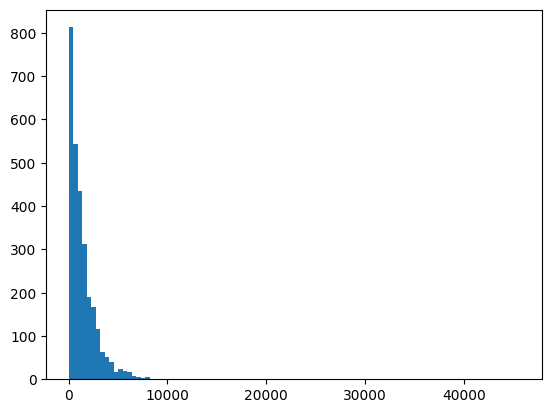

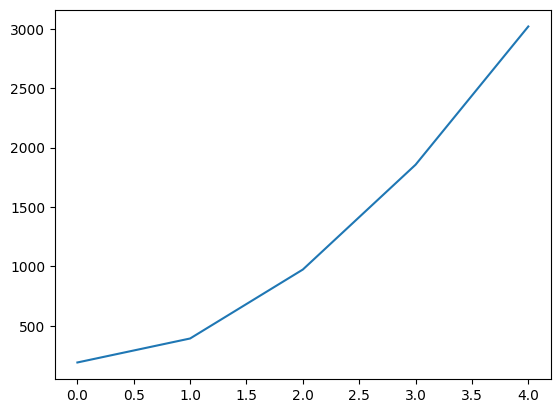

In [55]:
import matplotlib.pyplot as plt
import numpy as np
max(token_counts)
#make a histogram of the token counts
plt.hist(token_counts, bins=100)
plt.show()

#do quantile plots
plt.plot(np.quantile(token_counts, [0.1, 0.25, 0.5, 0.75, 0.9]))
plt.show()

In [62]:
counts = np.array(token_counts)

len(counts[counts>10000])

#get the articles with more than 10000 tokens
articles_long = [articles[i] for i in range(len(articles)) if token_counts[i] > 10000]











In [65]:
print(articles_long[1].page_content)


     (Summary  of the Ashirvachan              The goal in everyone's life is
delivered  by His Holiness  at Goregaon   happiness. He does not know
on 3-12-1975)                             what is happiness. He only knows
     In 1965, when we had last            that it means peace of mind,
come on an official tour with His         absence of worries and difficulties,
Holiness (Swami Anandashram),             ease and comfort etc., but he
we were wondering what was the            never gets it. That is because
object of having these official           what he takes for happiness is not
tours. Later on, as circumstances         true happiness, it is mere shadow
changed, we came to know of the           of happiness. Like a man who
love and faith of the laity, many         has carried a heavy load over a
of whom cannot come to the Math           long distance and finds instant
and whose love and devotion               relief when he puts down his
cannot reach the Guru. So, it is      

In [66]:
vector_db = load_vector_store()

2025-03-02 00:30:58 - Discovering subpackages in _NamespacePath(['/opt/anaconda3/envs/chitrapurgpt/lib/python3.12/site-packages/pinecone_plugins'])
2025-03-02 00:30:58 - Looking for plugins in pinecone_plugins.inference
2025-03-02 00:30:58 - Installing plugin inference into Pinecone
2025-03-02 00:30:59 - Discovering subpackages in _NamespacePath(['/opt/anaconda3/envs/chitrapurgpt/lib/python3.12/site-packages/pinecone_plugins'])
2025-03-02 00:30:59 - Looking for plugins in pinecone_plugins.inference


In [71]:
sum(list(vector_db._index.list()),[])

['Sunbeam-1954-January.txt-A New Landmark',
 'Sunbeam-1954-January.txt-Blessings from His Holiness',
 'Sunbeam-1954-January.txt-Cover Page',
 'Sunbeam-1954-January.txt-Nectar from the Gitas',
 'Sunbeam-1954-January.txt-New Nursery Rhymes',
 'Sunbeam-1954-January.txt-Shri Rama',
 'Sunbeam-1954-January.txt-Standing Committee Circular',
 'Sunbeam-1954-January.txt-The Temple of Sanatana-Dharma',
 'Sunbeam-1954-January.txt-The Treasure Supreme',
 'Sunbeam-1954-July.txt-Cover Page',
 'Sunbeam-1954-July.txt-Definitions',
 'Sunbeam-1954-July.txt-Dhruva',
 'Sunbeam-1954-July.txt-H.H. Shrimat Pandurangashrama Swamiji',
 'Sunbeam-1954-July.txt-Lakshmana',
 'Sunbeam-1954-July.txt-Math News and Notes',
 'Sunbeam-1954-July.txt-Real Austerity',
 'Sunbeam-1954-July.txt-Review',
 'Sunbeam-1954-July.txt-Samarth Ramdas and His Works',
 'Sunbeam-1954-July.txt-Savitri',
 'Sunbeam-1954-July.txt-Service of the Guru',
 'Sunbeam-1954-July.txt-True Wisdom',
 'Sunbeam-1954-July.txt-Vacancies in Vaikuntha',
 'Sun

In [74]:
cleaned_documents = [
    Document(
        page_content=doc.page_content, 
        metadata=clean_metadata(doc.metadata)
    ) for doc in articles
]

# Generate IDs for the documents
doc_ids = [get_doc_id(doc) for doc in cleaned_documents]

# First, check which documents already exist
# existing_ids = vector_db.get_by_ids(doc_ids)['ids']
vector_db._index.fetch(ids=doc_ids)

PineconeApiException: (414)
Reason: Request-URI Too Large
HTTP response headers: HTTPHeaderDict({'Server': 'awselb/2.0', 'Date': 'Sat, 01 Mar 2025 19:10:03 GMT', 'Content-Type': 'text/html', 'Content-Length': '142', 'Connection': 'close'})
HTTP response body: <html>
<head><title>414 Request-URI Too Large</title></head>
<body>
<center><h1>414 Request-URI Too Large</h1></center>
</body>
</html>



In [46]:
meta_clean = clean_metadata(articles[705].metadata)
meta = articles[705].metadata

for k, v in meta_clean.items():
    if v != meta[k]:
        print(k, v, meta[k])


In [5]:
import asyncio
from typing import Annotated

import chainlit as cl
from langchain_openai import ChatOpenAI
from langchain_anthropic import ChatAnthropic
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_community.retrievers.bm25 import BM25Retriever
from langchain_core.messages import SystemMessage, HumanMessage, ToolMessage, BaseMessage
from langchain_core.documents import Document
from langchain_core.tools import tool
from langsmith import traceable
from pydantic import BaseModel, Field

from retrievers import format_docs, load_docs_from_jsonl, ExactMatchRetriever, BM25Retriever, HybridRetriever, deduplicate_docs, FuzzyMatchRetriever, load_vector_store
from steps import generate_search_queries


documents = load_docs_from_jsonl('knowledge_base.jsonl')
bm_25_retriever = BM25Retriever.from_documents(documents=documents, k=4)
fuzzy_match_retriever = FuzzyMatchRetriever(documents=documents, k=4)
vector_db_retriever = load_vector_store().as_retriever(search_type="mmr",search_kwargs={"k": 4, "fetch_k": 10})
retriever = HybridRetriever(bm_25_retriever=bm_25_retriever, fuzzy_match_retriever=fuzzy_match_retriever, vector_db_retriever=vector_db_retriever)


class RelevantPassages(BaseModel):
    reasoning: str = Field(description="reasoning for the compressed document")
    passages_in_context: list[str] | None = Field(description="summarised passages that are relevant to the query. return nothing if no relevant passages are found. each passage can be upto 5 sentences long")

async def contextualize_docs(docs: list[Document], query: str) -> list[Document]:
    prompt = f"""
Your task is to extract information relevant to the query from the following document.
Your extractions should accurately summarise the document in the context of the query while also quoting the passage verbatim. 
The query is: {query}
    """
    messages_batch = [[SystemMessage(content=prompt), HumanMessage(content=f"Here is the document: {format_docs([doc])}")] for doc in docs]
    llm = ChatGoogleGenerativeAI(model="gemini-1.5-pro", temperature=0, max_tokens=8000).with_structured_output(RelevantPassages)
    compressed_docs = await llm.abatch(messages_batch)

    contextualized_docs = []
    for compressed_doc, doc in zip(compressed_docs, docs):
        if compressed_doc.passages_in_context:
            doc.page_content = f"Here are the relevant passages from this document: {"\n".join(compressed_doc.passages_in_context)}"
            contextualized_docs.append(doc)
    return contextualized_docs

@tool
async def search_knowledge_base(research_query: str) -> str:
    """
    Search the knowledge base to get relevant magazine articles.
    The query should be a question that you want to answer.
    """

    queries = await generate_search_queries(research_query)

    # search the knowledge base
    docs = await retriever.abatch(queries)
    docs = deduplicate_docs(docs)

    #contextual compression
    contextualized_docs = await contextualize_docs(docs, research_query)

    return format_docs(contextualized_docs)

2025-03-02 03:33:41 - Discovering subpackages in _NamespacePath(['/opt/anaconda3/envs/chitrapurgpt/lib/python3.12/site-packages/pinecone_plugins'])
2025-03-02 03:33:41 - Looking for plugins in pinecone_plugins.inference
2025-03-02 03:33:41 - Installing plugin inference into Pinecone
2025-03-02 03:33:42 - Index chitrapur-gpt already exists
2025-03-02 03:33:42 - Discovering subpackages in _NamespacePath(['/opt/anaconda3/envs/chitrapurgpt/lib/python3.12/site-packages/pinecone_plugins'])
2025-03-02 03:33:42 - Looking for plugins in pinecone_plugins.inference


In [6]:
prompt = """
You are a helpful research assistant who can answer questions about the chitrapur saraswat religious community by thoroughly studying magazine articles in your knowledge base. 
you have access to a search_knowledge_base tool that can search the knowledge base to get relevant magazine articles. 
You may use this tool multiple times to get more information.
When responding to the user, add citations to the sources you used to answer in wikipedia format. sources should not be duplicated.
Before you give your answer to the user, think about your reasoning step by step and draft your answer, making sure citation formatting is correct.
Put your final answer in <final_answer></final_answer> tags. Don't forget to close the tags.

Here is some relevant information about the chitrapur saraswat samaj:
- the main holy site of the chitrapur saraswat samaj is the chitrapur math.
- the religious leader of the chitrapur saraswat samaj is called swamiji.

<citation example>
After looking at the knowledge base, I found the following information:
more information goes here...

<final_answer>
The first president of the chitrapur saraswat samaj was <name> [1] and was appointed on <date> [2]. Additionally, the second president was <name> [1].

sources:
[1] <title of article 1>, <document 1> page <start page number>-<end page number>
[2] <title of article 2>, <document 2> page <start page number>-<end page number>
</final_answer>

</citation_example>
"""
human_message = "tell me about the first swamiji. Tell me about his life and work."

messages = [
    SystemMessage(content=prompt),
    HumanMessage(content=human_message),
]

llm = ChatAnthropic(model="claude-3-5-sonnet-latest", temperature=0, max_tokens=8000).bind_tools([search_knowledge_base], parallel_tool_calls=False)


messages.append(await llm.ainvoke(messages))

while messages[-1].tool_calls:
    for tool_call in messages[-1].tool_calls:
        if tool_call["name"] == "search_knowledge_base":
            print(tool_call)
            tool_response = await search_knowledge_base.ainvoke(tool_call["args"])
            messages.append(ToolMessage(content=tool_response, tool_call_id=tool_call["id"]))
    messages.append(await llm.ainvoke(messages))




2025-03-02 03:33:47 - HTTP Request: POST https://api.anthropic.com/v1/messages "HTTP/1.1 200 OK"
{'name': 'search_knowledge_base', 'args': {'research_query': 'Who was the first Swamiji? What was his life and work like?'}, 'id': 'toolu_01F69gJsi3ZREP9FLQEvYjHT', 'type': 'tool_call'}
2025-03-02 03:33:52 - HTTP Request: POST https://api.anthropic.com/v1/messages "HTTP/1.1 200 OK"
2025-03-02 03:33:52 -  generated queries: ['first Swamiji', 'earliest Swamiji', 'Swamiji history origin', 'Swami Vivekananda biography', 'Swami Vivekananda life work', 'first Hindu monk Swami']
2025-03-02 03:33:58 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2025-03-02 03:33:58 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2025-03-02 03:33:58 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2025-03-02 03:33:58 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2025-03-02 03:33:58 - HTTP Request: POST h

In [7]:
messages

[SystemMessage(content="\nYou are a helpful research assistant who can answer questions about the chitrapur saraswat religious community by thoroughly studying magazine articles in your knowledge base. \nyou have access to a search_knowledge_base tool that can search the knowledge base to get relevant magazine articles. \nYou may use this tool multiple times to get more information.\nWhen responding to the user, add citations to the sources you used to answer in wikipedia format. sources should not be duplicated.\nBefore you give your answer to the user, think about your reasoning step by step and draft your answer, making sure citation formatting is correct.\nPut your final answer in <final_answer></final_answer> tags. Don't forget to close the tags.\n\n<citation example>\nAfter looking at the knowledge base, I found the following information:\nmore information goes here...\n\n<final_answer>\nThe first president of the chitrapur saraswat samaj was <name> [1] and was appointed on <date

In [8]:
for message in messages:
    message.pretty_print()

================================ System Message ================================


You are a helpful research assistant who can answer questions about the chitrapur saraswat religious community by thoroughly studying magazine articles in your knowledge base. 
you have access to a search_knowledge_base tool that can search the knowledge base to get relevant magazine articles. 
You may use this tool multiple times to get more information.
When responding to the user, add citations to the sources you used to answer in wikipedia format. sources should not be duplicated.
Before you give your answer to the user, think about your reasoning step by step and draft your answer, making sure citation formatting is correct.
Put your final answer in <final_answer></final_answer> tags. Don't forget to close the tags.

<citation example>
After looking at the knowledge base, I found the following information:
more information goes here...

<final_answer>
The first president of the chitrapur saraswat sa

In [24]:
from tiktoken import get_encoding
encoding = get_encoding("cl100k_base")

len(encoding.encode(messages[-1].content))

print(messages[-1].content)

Based on the search results, I can provide information about the first religious head (Guru) of the Chitrapur Saraswat community.

<thinking>
The search results reveal details about the first Guru, Swami Parijnanashram I, who was installed as the Guru in 1708 AD at Gokarn. Let me compile the key information about his arrival and installation as the first Guru.
</thinking>

<answer>
The first religious head of the Chitrapur Saraswat community was H.H. Shrimat Parijnanashram Swamiji I (1708-1720 AD). Here are the key details about his becoming the first Guru:

In 1708 AD, when the Saraswat community had no spiritual leader, the elders gathered at Gokarn and prayed to Lord Mahabaleshwar for a Guru. The Lord assured them that a Sanyasi would visit Kotiteerth from the Northern side the next day who would be their Guru [1].

Parijnanashram Swamiji I was a learned Sanskrit scholar, extremely pious, a devout Yogi and ever obliging. His yogic powers were extraordinary. After the elders met him 

In [25]:
dir(llm)

['InputType',
 'OutputType',
 '__abstractmethods__',
 '__annotations__',
 '__class__',
 '__class_getitem__',
 '__class_vars__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__fields__',
 '__fields_set__',
 '__format__',
 '__ge__',
 '__get_pydantic_core_schema__',
 '__get_pydantic_json_schema__',
 '__getattr__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__or__',
 '__orig_bases__',
 '__parameters__',
 '__pretty__',
 '__private_attributes__',
 '__pydantic_complete__',
 '__pydantic_computed_fields__',
 '__pydantic_core_schema__',
 '__pydantic_custom_init__',
 '__pydantic_decorators__',
 '__pydantic_extra__',
 '__pydantic_fields__',
 '__pydantic_fields_set__',
 '__pydantic_generic_metadata__',
 '__pydantic_init_subclass__',
 '__pydantic_parent_namespace__',
 '__pydantic_post_init__',
 '__pydantic_private__',
 '__

In [ ]:
while response.tool_calls:
    for tool_call in response.tool_calls:
        if tool_call["name"] == "search_knowledge_base":
            tool_response = await search_knowledge_base.ainvoke(tool_call["args"])
            messages.append(ToolMessage(content=tool_response, tool_call_id=tool_call["id"]))
            response = await llm.ainvoke(messages)

AttributeError: 'dict' object has no attribute 'function'

In [14]:
tool_call

{'name': 'search_knowledge_base',
 'args': {'queries': ['first president chitrapur saraswat samaj',
   'early history chitrapur saraswat samaj president']},
 'id': 'toolu_011KFsXpVa3T7ZmByZCEdBSP',
 'type': 'tool_call'}

In [13]:
await search_knowledge_base.ainvoke(tool_call["args"])

2025-03-02 01:43:07 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2025-03-02 01:43:08 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


'0. Conference Proceedings and Committee Reports\n Metadata:\n{\'author\': None,\n \'end_line\': 2904,\n \'end_page\': 77,\n \'published_date\': \'01-10-1969\',\n \'source\': \'Sunbeam-1969-October.txt\',\n \'start_line\': 771,\n \'start_page\': 22,\n \'summary\': \'Detailed proceedings of conferences and various committee reports \'\n            \'including proposed amendments to constitutions\',\n \'title\': \'Conference Proceedings and Committee Reports\'}\nContent:\nSABHAS AND MEMBERS OF THE STANDING COMMITTEE\n                            AND MEETING OF THE\n       STANDING COMMITTEE  HELD ON 9th AND 10th\n                    AUGUST, 1969, RESPECTIVELY.\n\n     The proceedings of the Conference of the Presidents of all Local Sabhas jointly\nwith members of the Standing Committee and the Minutes of the Standing\nCommittee meeting held on 9th and 10th August, 1969, respectively are\npublished elsewhere in this issue.\n\n     The said proceedings and the minutes were duly presented to

In [6]:
from pinecone import Pinecone
from langchain_community.retrievers import (
    PineconeHybridSearchRetriever,
)
from retrievers import load_docs_from_jsonl
from pinecone_text.sparse import BM25Encoder

In [13]:
pc = Pinecone()
index = pc.Index("chitrapur-gpt")

In [14]:
articles = load_docs_from_jsonl('knowledge_base.jsonl')
corpus = [article.page_content for article in articles]

bm25_encoder = BM25Encoder()
bm25_encoder.fit(corpus)

100%|██████████| 5924/5924 [00:18<00:00, 321.28it/s]


In [15]:
bm25_encoder.dump("bm25_values.json")

In [11]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/personal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
nltk.data.find('tokenizers/punkt')

FileSystemPathPointer('/Users/personal/nltk_data/tokenizers/punkt')

In [18]:
import asyncio
from typing import Annotated
import logging
import re
import chainlit as cl
from langchain_openai import ChatOpenAI, OpenAIEmbeddings
from langchain_anthropic import ChatAnthropic
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_community.retrievers import PineconeHybridSearchRetriever
from langchain_community.retrievers.bm25 import BM25Retriever
from pinecone_text.sparse import BM25Encoder
from pinecone import Pinecone
from langchain_core.messages import SystemMessage, HumanMessage, ToolMessage, BaseMessage
from langchain_core.documents import Document
from langchain_core.tools import tool
from langsmith import traceable
from pydantic import BaseModel, Field

from retrievers import format_docs, load_docs_from_jsonl, BM25Retriever, HybridRetriever, deduplicate_docs, FuzzyMatchRetriever, load_vector_store


# bm_25_retriever = BM25Retriever.from_documents(documents=load_docs_from_jsonl('knowledge_base.jsonl'), k=4)
# vector_db_retriever = load_vector_store().as_retriever(search_type="mmr",search_kwargs={"k": 4, "fetch_k": 10})
# retriever = HybridRetriever(bm_25_retriever=bm_25_retriever, vector_db_retriever=vector_db_retriever)

# retriever = PineconeHybridSearchRetriever(
#     embeddings=OpenAIEmbeddings(model="text-embedding-3-large"),
#     sparse_encoder=BM25Encoder().load("bm25_values.json"), 
#     index=Pinecone().Index("chitrapur-gpt")
# )
retriever = load_vector_store().as_retriever(search_type="mmr",search_kwargs={"k": 4, "fetch_k": 10})

2025-03-03 14:33:10 - Discovering subpackages in _NamespacePath(['/opt/anaconda3/envs/chitrapurgpt/lib/python3.12/site-packages/pinecone_plugins'])
2025-03-03 14:33:10 - Looking for plugins in pinecone_plugins.inference
2025-03-03 14:33:10 - Installing plugin inference into Pinecone
2025-03-03 14:33:11 - Index chitrapur-gpt already exists
2025-03-03 14:33:11 - Discovering subpackages in _NamespacePath(['/opt/anaconda3/envs/chitrapurgpt/lib/python3.12/site-packages/pinecone_plugins'])
2025-03-03 14:33:11 - Looking for plugins in pinecone_plugins.inference


In [21]:
await retriever.abatch(["what is the main holy site of the chitrapur saraswat samaj?", "what is the main holy site of the chitrapur saraswat samaj?"])

2025-03-03 14:41:17 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2025-03-03 14:41:18 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


[[Document(metadata={'author': 'Unknown', 'end_line': 981.0, 'end_page': 29.0, 'published_date': '01-06-2020', 'source': 'Sunbeam-2020-June.txt', 'start_line': 952.0, 'start_page': 29.0, 'summary': 'List of locations where P.P. Shrimat Sadyojat Shankarashram Swamiji observed Chaturmasya Vrata from 1997 to 2020.', 'title': 'Chaturmasya Vrata Observed by P.P. Shrimat Sadyojat Shankarashram Swamiji'}, page_content='         P.P. SHRIMAT SADYOJAT\n  SHANKARASHRAM SWAMIJI FROM\n               1997 ONWARDS :\n\n 1997     Shirali            2009      Shirali\n\n 1998     Bengaluru          2010      Karla\n\n 1999     Mallapur           2011      Gokarna\n\n 2000     Pune               2012      Shirali\n\n 2001     Gokarna            2013      Mangalore\n\n 2002     Mangalore          2014      Shirali\n\n 2003     Shirali            2015      Mallapur\n\n 2004     Vittal             2016      Shirali\n\n 2005     Hubli              2017      Karla\n\n 2006     Karla              2018      S

In [1]:
from retrievers import format_docs, deduplicate_docs, load_vector_store, FuzzyMatchRetriever, load_docs_from_jsonl, HybridRetriever

fuzzy_retriever = FuzzyMatchRetriever(documents=load_docs_from_jsonl("knowledge_base.jsonl"), k=5, metadata_weight=0.1, content_weight=0.9, threshold=30)

/opt/anaconda3/envs/chitrapurgpt/lib/python3.12/site-packages/pinecone/data/index.py:1: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [5]:
fuzzy_retriever.invoke("chitrapur math history")

[Document(metadata={'source': 'Sunbeam-1956-October.txt', 'published_date': '01-10-1956', 'title': 'The Shri Chitrapur Math', 'author': 'H. Shankar Rau', 'summary': 'History and details about the Shri Chitrapur Math, including its establishment, line of Gurus, administration, and recent developments under the current Guru.', 'start_line': 465, 'end_line': 638, 'start_page': 13, 'end_page': 16}, page_content="\n[Abridged from a narrative prepared  by the Editor for the forthcoming Chitrapur\n                                    Saraswat Directory, 1956]\n\n     The Vital Link. -- If there is any  single connecting link which holds together\nthe widely scattered units of the Community   more  strongly and more  surely than\nany  other, it is the great Shri Chitrapur Math with its brilliant line of revered\nGurus. Amongst  the Community   's few central institutions, it is easily the oldest.\nAmongst   the Community   's religious institutions, it is certainly one of the oldest.\n\n     Th

In [2]:
from retrievers import load_docs_from_jsonl


/opt/anaconda3/envs/chitrapurgpt/lib/python3.12/site-packages/pinecone/data/index.py:1: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [3]:
def parse_boolean_query(query: str) -> list[str]:
    """Parse a boolean query into a list of terms and operators."""
    # Convert to lowercase for case-insensitive search
    query = query.lower()
    terms = []
    current_term = ""
    i = 0
    
    while i < len(query):
        if query[i].isspace():
            if current_term:
                terms.append(current_term)
                current_term = ""
            i += 1
        elif query[i] == '(':
            # Find matching closing bracket
            bracket_count = 1
            j = i + 1
            while j < len(query) and bracket_count > 0:
                if query[j] == '(':
                    bracket_count += 1
                elif query[j] == ')':
                    bracket_count -= 1
                j += 1
            if current_term:
                terms.append(current_term)
            terms.append(query[i:j])
            current_term = ""
            i = j
        elif query[i:i+3] == 'and' or query[i:i+2] == 'or':
            if current_term:
                terms.append(current_term)
            terms.append(query[i:i+3] if query[i:i+3] == 'and' else query[i:i+2])
            current_term = ""
            i += 3 if query[i:i+3] == 'and' else 2
        else:
            current_term += query[i]
            i += 1
    
    if current_term:
        terms.append(current_term)
    
    return [term.strip() for term in terms if term.strip()]

def evaluate_boolean_expression(terms: list[str], doc_content: str) -> bool:
    """Evaluate a boolean expression against document content."""
    if not terms:
        return False
    
    # Base case: single term
    if len(terms) == 1:
        term = terms[0]
        if term.startswith('(') and term.endswith(')'):
            # Recursive case for nested expressions
            inner_terms = parse_boolean_query(term[1:-1])
            return evaluate_boolean_expression(inner_terms, doc_content)
        return term in doc_content
    
    # Process OR operations first
    while 'or' in terms:
        i = terms.index('or')
        left = terms[i-1]
        right = terms[i+1]
        
        # Evaluate left and right terms
        left_result = evaluate_boolean_expression([left], doc_content)
        right_result = evaluate_boolean_expression([right], doc_content)
        
        # Replace the OR expression with its result
        terms[i-1:i+2] = [left_result or right_result]
    
    # Process AND operations
    while 'and' in terms:
        i = terms.index('and')
        left = terms[i-1]
        right = terms[i+1]
        
        # Evaluate left and right terms
        left_result = evaluate_boolean_expression([left], doc_content)
        right_result = evaluate_boolean_expression([right], doc_content)
        
        # Replace the AND expression with its result
        terms[i-1:i+2] = [left_result and right_result]
    
    return bool(terms[0]) if terms else False

def search_knowledge_base(query: str):
    docs = load_docs_from_jsonl("knowledge_base.jsonl")
    matching_docs = []
    
    # Parse the query into terms
    terms = parse_boolean_query(query)
    
    # Search through documents
    for doc in docs:
        # Convert document content to lowercase for case-insensitive search
        doc_content = doc.page_content.lower()
        
        # Evaluate the boolean expression for this document
        if evaluate_boolean_expression(terms, doc_content):
            matching_docs.append(doc)
    
    return matching_docs

In [1]:

from search_engine import *

/opt/anaconda3/envs/chitrapurgpt/lib/python3.12/site-packages/pinecone/data/index.py:1: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [6]:
query = "(viswesvara OR vishveshwara OR visveswara)"
search_knowledge_base(query)

Found 2 matching documents

1. Gems of Magha (Source: Sunbeam-2002-March.txt)
Snippet: ...g of
Lord Dattatraya's second Avataar,       Lord Vishveshwara and spending
was born in a Vasliistgotriregular h...

2. From the Presidents Desk (Source: Sunbeam-2011-November.txt)
Snippet: ...
power-cuts. The State Minister of Education Shri
Vishveshwara Hegde Kageri was the Chief Guest and the
lamps we...


[Document(metadata={'source': 'Sunbeam-2002-March.txt', 'published_date': '01-03-2002', 'title': 'Gems of Magha', 'author': 'Dr. Suvarna Baljekar', 'summary': 'Article about the significance of the month of Magha and various religious observances during this period', 'start_line': 860, 'end_line': 1037, 'start_page': 25, 'end_page': 31}, page_content='\n                      DR. SUVARNA BALJEKAR\n\n    This month of \'Magha\' (11th         popular amongst the peasant com\naccording to the Hindu Calendar)        munity and worshipped right from\nis very auspicious indeed. The          Pre-Christ era. Ganesha has been\noriginal name being \'Tapas\' but         mentioned as "Rakhshas Devata"\nowing to the appearance of              in the 6th century chronicles while\n\'Magha\' Nakshatra on the full           as "Author of Vyas" in the 10th\nmoon day, this month came to be         century chronicles after which He\ncalled as Magha. It is enriched         attained special eminence (pre\nwi